In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import adam_v2
from keras.callbacks import ModelCheckpoint

In [3]:
import matplotlib.pyplot as plt

In [ ]:
keras.__version__

'2.7.0'

In [ ]:
train_data_path = "/content/drive/MyDrive/horse-or-human/train"
validation_data_path = "/content/drive/MyDrive/horse-or-human/validation"

In [ ]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range = 40,
                                      width_shift_range=0.2,
                                      height_shift_range = 0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip = True,
                                      fill_mode='nearest')

In [ ]:
training_data = training_datagen.flow_from_directory(train_data_path,
                                     target_size=(150,150),
                                     batch_size=32,
                                     class_mode='binary')

Found 1027 images belonging to 2 classes.


In [ ]:
training_data.class_indices

{'horses': 0, 'humans': 1}

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                               target_size=(150,150),
                                                batch_size=32,
                                               class_mode='binary')

Found 256 images belonging to 2 classes.


In [ ]:
 
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

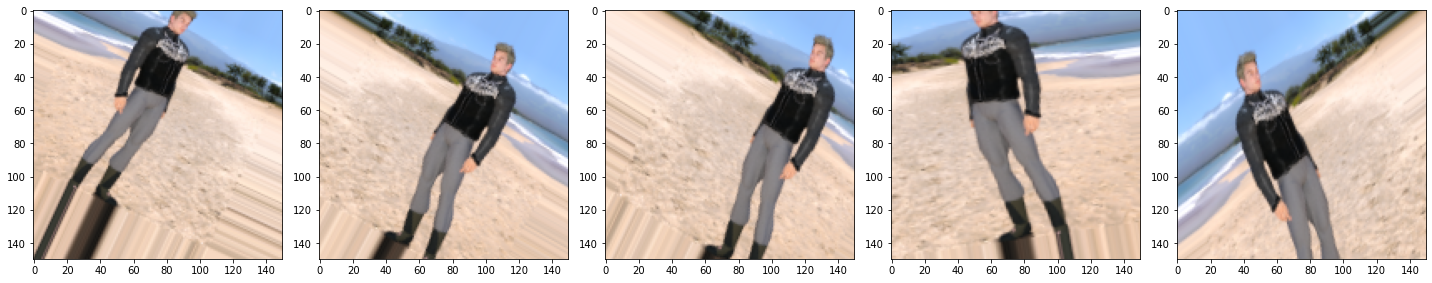

In [ ]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [ ]:
cnn_model = keras.models.Sequential([keras.layers.Conv2D(filters=32, kernel_size=3,input_shape=[150, 150, 3]),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     keras.layers.Conv2D(filters=64,kernel_size=3),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     keras.layers.Conv2D(filters=128,kernel_size=3),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     keras.layers.Conv2D(filters=256,kernel_size=3),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),


                                     keras.layers.Dropout(0.5),
                                     keras.layers.Flatten(),
                                     keras.layers.Dense(units=128,activation='relu'),
                                     keras.layers.Dropout(0.1),
                                     keras.layers.Dense(units=256,activation='relu'),
                                     keras.layers.Dropout(0.25),
                                     keras.layers.Dense(units=2,activation='softmax')
])

In [ ]:
cnn_model.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_path = '/content/drive/MyDrive/horse-or-human/horse_or_human_predictor.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
history = cnn_model.fit(training_data, 
                          epochs=100, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/100
33/33 [==============================] - ETA: 0s - loss: 0.7786 - accuracy: 0.5365
Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to /content/drive/MyDrive/horse-or-human/horse_or_human_predictor.h5
33/33 [==============================] - 282s 9s/step - loss: 0.7786 - accuracy: 0.5365 - val_loss: 0.7270 - val_accuracy: 0.5000
Epoch 2/100
33/33 [==============================] - ETA: 0s - loss: 0.6077 - accuracy: 0.6884
Epoch 00002: val_accuracy improved from 0.50000 to 0.53516, saving model to /content/drive/MyDrive/horse-or-human/horse_or_human_predictor.h5
33/33 [==============================] - 62s 2s/step - loss: 0.6077 - accuracy: 0.6884 - val_loss: 1.1200 - val_accuracy: 0.5352
Epoch 3/100
33/33 [==============================] - ETA: 0s - loss: 0.5151 - accuracy: 0.7488
Epoch 00003: val_accuracy improved from 0.53516 to 0.61719, saving model to /content/drive/MyDrive/horse-or-human/horse_or_human_predictor.h5
33/33 [==========================

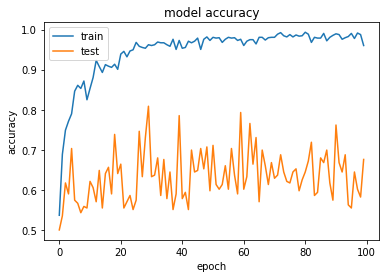

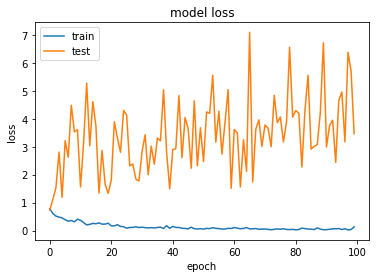

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [4]:
model_path1 = '/content/drive/MyDrive/horse-or-human/horse_or_human_predictor.h5' #new model.ipynb
model_path2 = '/content/drive/MyDrive/horse-or-human/horse_or_human_predictor.h5' #v2 solve overfitting Horse_or_human Classification using CNN.ipynb
model_path3 = '/content/drive/MyDrive/horse-or-human/horse_or_human_predictor.h5' #v2 solve overfitting Horse_or_human Classification using CNN.ipynb
 
model1 = keras.models.load_model(model_path1)
model2 = keras.models.load_model(model_path2)
model3 = keras.models.load_model(model_path3)
 

In [8]:
h1 = '/content/drive/MyDrive/horse-or-human/horse-or-human/train/horses/horse01-0.png'
h2 = '/content/drive/MyDrive/horse-or-human/horse-or-human/train/horses/horse04-4.png'
h3 = '/content/drive/MyDrive/horse-or-human/horse-or-human/train/horses/horse04-7.png'
h4 = '/content/drive/MyDrive/horse-or-human/horse-or-human/train/horses/horse10-4.png'
h5 = '/content/drive/MyDrive/horse-or-human/horse-or-human/train/horses/horse20-6.png'
h6 = '/content/drive/MyDrive/horse-or-human/horse-or-human/train/horses/horse34-6.png'
h7 = '/content/drive/MyDrive/horse-or-human/horse-or-human/train/horses/horse44-6.png'
h8 ="/content/drive/MyDrive/horse-or-human/horse-or-human/train/horses/horse48-9.png"

In [9]:
hu1 = '/content/drive/MyDrive/horse-or-human/validation/humans/valhuman01-09.png'
hu2 = '/content/drive/MyDrive/horse-or-human/validation/humans/valhuman02-18.png'
hu3 = '/content/drive/MyDrive/horse-or-human/validation/humans/valhuman03-23.png'
hu4 = '/content/drive/MyDrive/horse-or-human/validation/humans/valhuman04-24.png'
hu5 = '/content/drive/MyDrive/horse-or-human/validation/humans/valhuman05-19.png'
hu6 = '/content/drive/MyDrive/horse-or-human/validation/humans/valhuman01-13.png'
 
import numpy as np
from keras.preprocessing import image
 
def pred_human_horse(model, horse_or_human):
  test_image = image.load_img(horse_or_human, target_size = (150, 150))
  test_image = image.img_to_array(test_image)/255
  test_image = np.expand_dims(test_image, axis = 0)
 
  result = model.predict(test_image).round(3)
 
  pred = np.argmax(result)
  print(result, "--->>>", pred)
 
  if pred == 0:
    print('Predicted>>> Horse')
  else:
    print('Predicted>>> Human')
 
"""## Predict Output"""
 
for horse_or_human in [h1,h2,h3,h4,h5,h6,h7,h8, hu1,hu2,hu3,hu4,hu5,hu6]:
  pred_human_horse(model1, horse_or_human)
 
for horse_or_human in [h1,h2,h3,h4,h5,h6,h7,h8, hu1,hu2,hu3,hu4,hu5,hu6]:
  pred_human_horse(model2, horse_or_human)
 
for horse_or_human in [h1,h2,h3,h4,h5,h6,h7,h8, hu1,hu2,hu3,hu4,hu5,hu6]:
  pred_human_horse(model3, horse_or_human)


[[0.998 0.002]] --->>> 0
Predicted>>> Horse
[[0.988 0.012]] --->>> 0
Predicted>>> Horse
[[1. 0.]] --->>> 0
Predicted>>> Horse
[[1. 0.]] --->>> 0
Predicted>>> Horse
[[1. 0.]] --->>> 0
Predicted>>> Horse
[[0.992 0.008]] --->>> 0
Predicted>>> Horse
[[1. 0.]] --->>> 0
Predicted>>> Horse
[[0.998 0.002]] --->>> 0
Predicted>>> Horse
[[0. 1.]] --->>> 1
Predicted>>> Human
[[0. 1.]] --->>> 1
Predicted>>> Human
[[0. 1.]] --->>> 1
Predicted>>> Human
[[0. 1.]] --->>> 1
Predicted>>> Human
[[0. 1.]] --->>> 1
Predicted>>> Human
[[0. 1.]] --->>> 1
Predicted>>> Human
[[0.998 0.002]] --->>> 0
Predicted>>> Horse
[[0.988 0.012]] --->>> 0
Predicted>>> Horse
[[1. 0.]] --->>> 0
Predicted>>> Horse
[[1. 0.]] --->>> 0
Predicted>>> Horse
[[1. 0.]] --->>> 0
Predicted>>> Horse
[[0.992 0.008]] --->>> 0
Predicted>>> Horse
[[1. 0.]] --->>> 0
Predicted>>> Horse
[[0.998 0.002]] --->>> 0
Predicted>>> Horse
[[0. 1.]] --->>> 1
Predicted>>> Human
[[0. 1.]] --->>> 1
Predicted>>> Human
[[0. 1.]] --->>> 1
Predicted>>> Human
[[